# Classification

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout

## Classification

In [3]:
df = pd.read_csv("clsf_nn.csv")
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,education_secondary,education_tertiary,education_unknown
0,60,39,5,208,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,37,0,5,137,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,50,49,5,180,2,-1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,54,1291,5,266,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
4,49,154,5,357,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [4]:
X = df.drop('y', axis = 1)
y = df['y']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, 
                 random_state=15)

In [7]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(25, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)



Epoch 1/100


227/227 [==============================] - 5s 4ms/step - loss: 3.3979 - accuracy: 0.6871
Epoch 2/100
227/227 [==============================] - 1s 5ms/step - loss: 1.0233 - accuracy: 0.7171
Epoch 3/100
227/227 [==============================] - 1s 4ms/step - loss: 0.6978 - accuracy: 0.7469
Epoch 4/100
227/227 [==============================] - 1s 4ms/step - loss: 0.6841 - accuracy: 0.7549
Epoch 5/100
227/227 [==============================] - 1s 4ms/step - loss: 0.5998 - accuracy: 0.7681
Epoch 6/100
227/227 [==============================] - 1s 4ms/step - loss: 0.5762 - accuracy: 0.7831
Epoch 7/100
227/227 [==============================] - 1s 4ms/step - loss: 0.5724 - accuracy: 0.7802
Epoch 8/100
227/227 [==============================] - 1s 4ms/step - loss: 0.6086 - accuracy: 0.7805
Epoch 9/100
227/227 [==============================] - 1s 5ms/step - loss: 0.6087 - accuracy: 0.7797
Epoch 10/100
227/227 [==============================] - 1s 4ms/step - loss: 0.5511 - ac

227/227 [==============================] - 1s 4ms/step - loss: 0.4294 - accuracy: 0.8186
Epoch 74/100
227/227 [==============================] - 1s 5ms/step - loss: 0.4812 - accuracy: 0.8121
Epoch 75/100
227/227 [==============================] - 1s 5ms/step - loss: 0.4626 - accuracy: 0.8161
Epoch 76/100
227/227 [==============================] - 1s 5ms/step - loss: 0.4575 - accuracy: 0.8070
Epoch 77/100
227/227 [==============================] - 1s 5ms/step - loss: 0.4344 - accuracy: 0.8149
Epoch 78/100
227/227 [==============================] - 1s 5ms/step - loss: 0.4595 - accuracy: 0.8107
Epoch 79/100
227/227 [==============================] - 1s 5ms/step - loss: 0.4813 - accuracy: 0.8082
Epoch 80/100
227/227 [==============================] - 1s 5ms/step - loss: 0.4172 - accuracy: 0.8233
Epoch 81/100
227/227 [==============================] - 1s 5ms/step - loss: 0.4244 - accuracy: 0.8185
Epoch 82/100
227/227 [==============================] - 1s 5ms/step - loss: 0.4144 - accuracy: 

In [8]:
model.evaluate(X_test, y_test)

57/57 [==============================] - 1s 4ms/step - loss: 0.4036 - accuracy: 0.8229


[0.4036133885383606, 0.8229454159736633]

In [9]:
yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

57/57 [==============================] - 0s 3ms/step


In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       978
           1       0.83      0.77      0.80       835

    accuracy                           0.82      1813
   macro avg       0.82      0.82      0.82      1813
weighted avg       0.82      0.82      0.82      1813



Text(95.72222222222221, 0.5, 'Predicted')

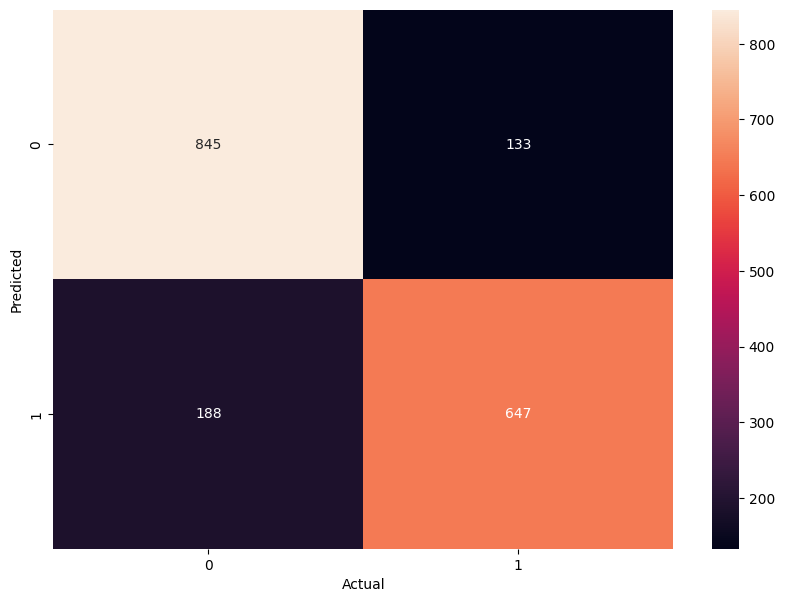

In [13]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Regression

In [14]:
df = pd.read_csv("rgrsnn_nn.csv")
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,education_secondary,education_tertiary,education_unknown,y_1
0,60,39,5,208,1,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,37,0,5,137,1,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,50,49,5,180,2,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,54,1291,5,266,1,-1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,49,154,5,357,1,-1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [15]:
X = df.drop('duration', axis = 1)
y = df['duration']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, 
                 random_state=15)

In [18]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(25, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
227/227 [==============================] - 4s 4ms/step - loss: 92071.5469 - mean_squared_error: 92071.5469
Epoch 2/100
227/227 [==============================] - 1s 4ms/step - loss: 65112.8945 - mean_squared_error: 65112.8945
Epoch 3/100
227/227 [==============================] - 1s 4ms/step - loss: 62224.2852 - mean_squared_error: 62224.2852
Epoch 4/100
227/227 [==============================] - 1s 4ms/step - loss: 61598.6680 - mean_squared_error: 61598.6680
Epoch 5/100
227/227 [==============================] - 1s 4ms/step - loss: 60864.3945 - mean_squared_error: 60864.3945
Epoch 6/100
227/227 [==============================] - 1s 4ms/step - loss: 60328.5469 - mean_squared_error: 60328.5469
Epoch 7/100
227/227 [==============================] - 1s 4ms/step - loss: 60080.8594 - mean_squared_error: 60080.8594
Epoch 8/100
227/227 [==============================] - 1s 4ms/step - loss: 59288.7461 - mean_squared_error: 59288.7461
Epoch 9/100
227/227 [===========================

227/227 [==============================] - 1s 4ms/step - loss: 39055.1328 - mean_squared_error: 39055.1328
Epoch 70/100
227/227 [==============================] - 1s 4ms/step - loss: 38213.7891 - mean_squared_error: 38213.7891
Epoch 71/100
227/227 [==============================] - 1s 4ms/step - loss: 38768.4023 - mean_squared_error: 38768.4023
Epoch 72/100
227/227 [==============================] - 1s 4ms/step - loss: 39191.2422 - mean_squared_error: 39191.2422
Epoch 73/100
227/227 [==============================] - 1s 4ms/step - loss: 38863.5703 - mean_squared_error: 38863.5703
Epoch 74/100
227/227 [==============================] - 1s 4ms/step - loss: 38595.1445 - mean_squared_error: 38595.1445
Epoch 75/100
227/227 [==============================] - 1s 4ms/step - loss: 39125.4336 - mean_squared_error: 39125.4336
Epoch 76/100
227/227 [==============================] - 1s 4ms/step - loss: 39125.8828 - mean_squared_error: 39125.8828
Epoch 77/100
227/227 [==============================]

In [19]:
model.evaluate(X_test, y_test)

57/57 [==============================] - 1s 4ms/step - loss: 39224.6953 - mean_squared_error: 39224.6953


[39224.6953125, 39224.6953125]